In [7]:
#Importing the necessary libraries.
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
#Getting the Data
train_data_frame = pandas.read_csv("1676558209_8416622_cleveland-train.csv")
matrix_x = (train_data_frame[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
vector_y = (train_data_frame['heartdisease::category|-1|1'])
vector_y[vector_y == -1] = 0

#Adding the intercepts
buff = []
for i in range(matrix_x.shape[0]):
    buff.append(1)
matrix_x.insert(0,'intercepts',buff)

In [9]:
#Hypothesis for Logistic Regression
def hypothesis(matrix_x, weights):
    Z = numpy.matmul(matrix_x, weights)
    return sigmoid(Z)

#Calculating the probability
def sigmoid(Z):
    return (1.0 / (1 + numpy.exp(-Z)))

#Calculating the cost/cross-entropy error
def cost_function(vector_y, vector_y_cap):
    return - numpy.sum(numpy.dot(vector_y.T,numpy.log(vector_y_cap + 1e-10)) + numpy.dot((1 - vector_y).T,numpy.log(1 - vector_y_cap + 1e-10))) / (len(vector_y))

#Updating the weights of the features at every step
def updating_the_weights(weights, vector_y , vector_y_cap, matrix_x, learning_rate):
    dw = numpy.dot((vector_y_cap - vector_y), matrix_x) / len(vector_y)
    weights_updated = weights - learning_rate * dw
    return weights_updated, dw
    
#Prediciting the class based on the Data
def prediction_function(matrix_x,weights):
    predicted_vector_y = hypothesis(matrix_x, weights)
    predicted_vector_y_class = []
    for i in predicted_vector_y:
        if i >= 0.5:
            predicted_vector_y_class.append(1)
        else:
            predicted_vector_y_class.append(-1)
    return predicted_vector_y_class


In [10]:
%%time

#Gradient Descent

iterations = 10000 #Experiment with 100k and 1M iterations
learning_rate = 10e-5

#Storing the entropy at each iteration for plotting the convergence graph
costs_at_all_iterations = []

#Initializing the weights of all features to 1
weights = []
for i in range(matrix_x.shape[1]):
    weights.append(1)

#Calculating the weights for the features
for i in range(iterations):
    vector_y_cap = hypothesis(matrix_x,weights)
    present_cost = cost_function(vector_y, vector_y_cap)
    old_weight = weights
    weights, dw = updating_the_weights(old_weight, vector_y, vector_y_cap, matrix_x, learning_rate)
    if all(dw < 10e-3): #We terminate when the gradient is less than 10e-3
        exit_point = i
        break
    costs_at_all_iterations.append(present_cost)
    
print("Cross-Entropy Error: ", present_cost)

Cross-Entropy Error:  0.6098175136729922
CPU times: user 17.1 s, sys: 120 ms, total: 17.2 s
Wall time: 17.4 s


Text(0.5, 1.0, 'Iterations vs Cost Function')

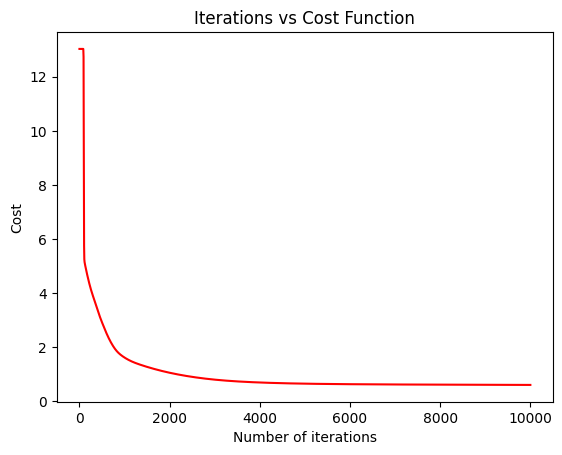

In [11]:
#Plotting for check convergence graph before Scaling

number_of_loops = range(0,iterations) #Use exit_point instead of iterations when iterations = 1M
plt.plot(number_of_loops,costs_at_all_iterations,'r-')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Iterations vs Cost Function')

In [12]:
%%time

#Predicting the values using the classifier
predicted_values = prediction_function(matrix_x,weights)

##Getting the accuracy of the model
train_data_frame = pandas.read_csv("1676558209_8416622_cleveland-train.csv")
actual_predictions = (train_data_frame['heartdisease::category|-1|1'])
accuracy = accuracy_score(actual_predictions, predicted_values)
print("Accuracy = ", accuracy)
print("Classification error = ", 1-accuracy)

Accuracy =  0.7894736842105263
Classification error =  0.21052631578947367
CPU times: user 9.48 ms, sys: 3.35 ms, total: 12.8 ms
Wall time: 11.9 ms


In [13]:
%%time

#Finding the accuracy when tranined using the logistic regression from sklearn
logistic_regression = LogisticRegression(max_iter = 10000)
logistic_regression_model = logistic_regression.fit(matrix_x, actual_predictions)
print("Accuracy of the model using sklearn (logistic regression)",accuracy_score(actual_predictions,logistic_regression.predict(matrix_x)))

Accuracy of the model using sklearn (logistic regression) 0.8223684210526315
CPU times: user 259 ms, sys: 13.1 ms, total: 272 ms
Wall time: 292 ms


In [14]:
%%time

#Testing the model on test data file
test_data_frame = pandas.read_csv("1676558209_8421676_cleveland-test.csv")
matrix_x_test = (test_data_frame[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
buff = []
for i in range(matrix_x_test.shape[0]):
    buff.append(1)
matrix_x_test.insert(0,'intercepts',buff)
predicted_class_test = prediction_function(matrix_x_test, weights)

#Generating the .csv with the classifications for each row in the test file
file = open("results_10k.csv","w",encoding='utf-8')
for i in predicted_class_test:
    file.write(str(i)+'\n')


CPU times: user 9.75 ms, sys: 859 µs, total: 10.6 ms
Wall time: 16.5 ms


In [ ]:
#Scaling the train data

train_data_frame_for_scaling = pandas.read_csv("1676558209_8416622_cleveland-train.csv")
matrix_x_scaling = (train_data_frame_for_scaling[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
vector_y_scaling = (train_data_frame_for_scaling['heartdisease::category|-1|1'])
vector_y_scaling[vector_y_scaling == -1] = 0

#Adding the intercepts
buff = []
for i in range(matrix_x_scaling.shape[0]):
    buff.append(1)
matrix_x_scaling.insert(0,'intercepts',buff)

#Scaling using StandardScaler
scalar = StandardScaler()
matrix_x_scaled = scalar.fit_transform(matrix_x_scaling)

In [16]:
%%time

#Gradient Descent after scaling

iterations_scaling = 1000000
learning_rate_scaling = 10e-5 #Experiment with different learning rates such as 10e-3,10e-4

#Storing the entropy at each iteration for plotting the convergence graph
costs_at_all_iterations_scaling = []

#Initializing the weights of features to 1
weights_scaling = []
for i in range(matrix_x_scaled.shape[1]):
    weights_scaling.append(1)

#Calculating the weights for the features
for i in range (iterations_scaling):
    vector_y_cap_scaling = hypothesis(matrix_x_scaled,weights_scaling)
    present_cost_scaling = cost_function(vector_y_scaling, vector_y_cap_scaling)
    old_weights_scaling = weights_scaling
    weights_scaling, dw_scaling = updating_the_weights(old_weights_scaling, vector_y_scaling, vector_y_cap_scaling, matrix_x_scaled, learning_rate_scaling)
    if all(dw_scaling < 10e-6):
        exit_point_scaling = i
        break
    costs_at_all_iterations_scaling.append(present_cost_scaling)
    
print("Cross-Entropy Error: ", present_cost_scaling)

Cross-Entropy Error:  0.41471841262244863
CPU times: user 6min 29s, sys: 2.17 s, total: 6min 31s
Wall time: 6min 37s


Text(0.5, 1.0, 'Iterations vs Cost Function')

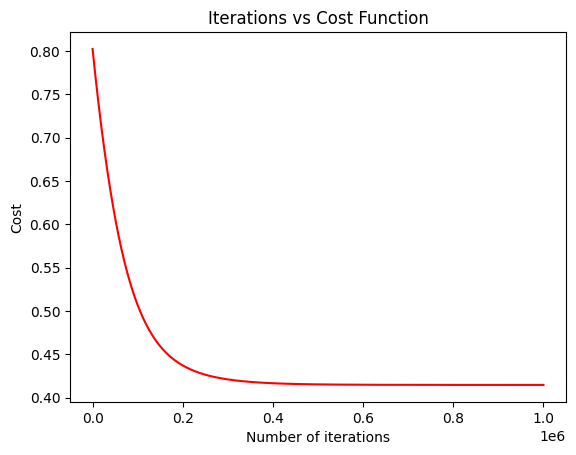

In [17]:
#Plotting for check convergence graph after Scaling

number_of_loops_scaling = range(0,iterations_scaling) #Use exit_point_scaling when learning_rate_scaling = 10e-4, 10e-3
plt.plot(number_of_loops_scaling, costs_at_all_iterations_scaling, 'r-')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Iterations vs Cost Function')

In [18]:
#Predicting values for classification after scaling the training data
predicted_values_scaling = prediction_function(matrix_x_scaled,weights_scaling)

#Getting the accuracy of the model after scaling
train_data_frame = pandas.read_csv("1676558209_8416622_cleveland-train.csv")
actual_predictions = (train_data_frame['heartdisease::category|-1|1'])
accuracy = accuracy_score(actual_predictions, predicted_values_scaling)
print("Accuracy = ", accuracy)
print("Classification error = ", 1-accuracy)

Accuracy =  0.8092105263157895
Classification error =  0.1907894736842105
